# Task-1 Prediction using Supervised ML.

Hello!
I am Akshay Bansode.

This is Task 1 of The Spark Foundations Intern Jan 2021

In this task we will predict the percentage of marks a student is expected to score based upon the hours they studied.

Data - http://bit.ly/w-data

In [2]:
## importing required libraries. 
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

Importing the data and analyzing it.

In [7]:
data = pd.read_csv('http://bit.ly/w-data')
print(data.head())
print(data.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25, 2)


Here you can see we only have 2 variables in this dataset.

In [9]:
## Check of any null values in the dataset.
print(data.isna().sum())

Hours     0
Scores    0
dtype: int64


Since there are no null entries we can proceed further.


Now lets visualize how the percentage of students(Score) relate with hours studied(Hours)

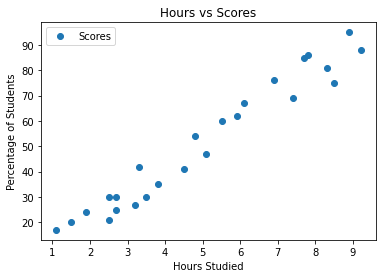

In [11]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage of Students')  
plt.show()

Here we can see that it is a linear relation (as expected).
So we can use Linear Regression model for this dataset.

Since there are only 2 variables, Feature selection will be direct.

In [15]:
## Store Hours as an array in X.
## Store Score as an array in Y.
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values

Making a Linear Regression Model and Splitting the data in training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0) 

model = LinearRegression()


Now we will train our Model using training data set (X_train, Y_train) and then test the Model by predicting Y (Y_pred) values using X_test and Compare this Y_pred values with the actual Y_test values to calculate accuracy of our Model. 

In [19]:
model.fit(X_train, Y_train) 
Y_pred = model.predict(X_test)

In [20]:
## calculating the Mean Absolute Error.
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.130879918502486


Nice, we have got small MAE.

Now lets calculate accuracy of our model.

In [23]:
model.score(X_test, Y_test)*100

93.67661043365055

This means our model is 93.67% accurate.

Let's visualize our Regression line with the given data.

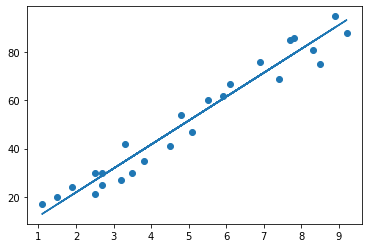

In [25]:
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [26]:
## Tabel showing predicted score and actual score.
df_Scores = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred},)  
df_Scores

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


Visualizing these values.

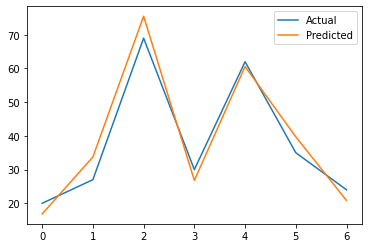

In [27]:
df_Scores.plot(kind='line')

What will be predicted score if a student studies for 9.25 hrs in a day?

In [29]:
Given_hours = [[9.25]]
Model_pred = model.predict(Given_hours)
print("No of Hours = {}".format(Given_hours))
print("Predicted Score = {}".format(Model_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.89272889341655


So, if a student studies for 9.25 hours he will score approx. 93.89% according to our model(based on given data)

Disclaimer- This is just a prediction using given data. You can study less hours and Score more, it is up to you.